# GRIP:THE SPARKS FOUNDATION  
## Data Analysis & Business Analytics 
### NAME : Sahil B. Jethva
## Task 2: Prediction Using Unsupervised ML
* From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.
* 

# Importing Necessary Libraries
* NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
* Pandas is a library written for the Python programming language for data manipulation and analysis
* Matplotlib is one of the most popular Python packages used for data visualization. It is a cross-platform library for making 2D plots from data in arrays.
* Seaborn is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis.
* Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python.

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlpb
import seaborn as sb
import csv
sb.set()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets

## Importing Data

In [57]:
iris = pd.read_csv('Iris.csv')
x = iris.iloc[:, [0, 1, 2, 3]].values
iris_df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
print("statistical summary of dataset ")
iris.describe()

statistical summary of dataset 


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Frequency distribution of Species

In [66]:
iris_species = pd.crosstab(index=iris["Species"], columns="count")
iris_species

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [68]:
iris_setosa=iris.loc[iris["Species"]=="Iris-setosa"]
iris_vesicolor=iris.loc[iris["Species"]=="Iris-versicolor"]
iris_virginica=iris.loc[iris["Species"]=="Iris-virginica"]

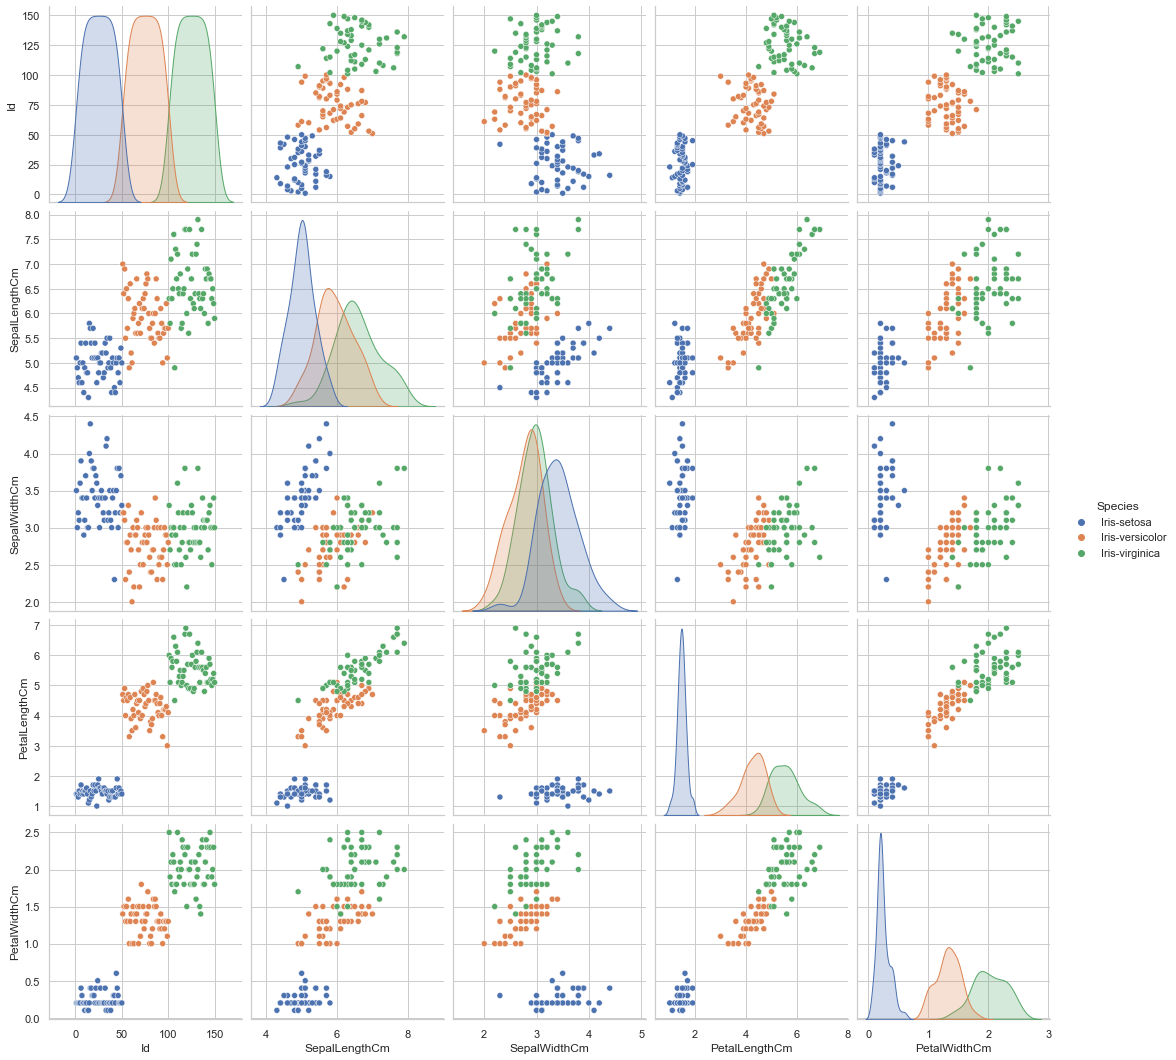

In [94]:
sb.set_style("whitegrid")
sb.pairplot(iris, hue="Species", height=3);
mlpb.show()

## Finding the optimum number of clusters for k-means classification

In [78]:
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\SWAYAM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [79]:
wcss

[281831.54466666665,
 70581.3808,
 31320.711199999998,
 17758.792503556186,
 11468.968747023808,
 7921.863473076924,
 5911.632365518541,
 4541.979023391813,
 3571.911095588235,
 2943.933100840336]

## Using the elbow method to determine the optimal number of clusters for k-means clustering

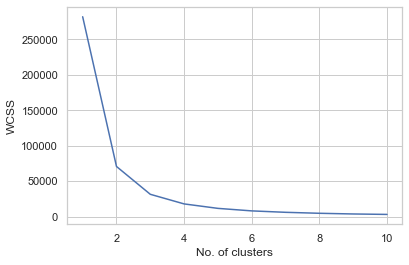

In [88]:
mlpb.plot(range(1,11), wcss)
mlpb.xlabel('No. of clusters')
mlpb.ylabel('WCSS')
mlpb.show()

### Implementing K-means Clustering

In [81]:
kmeans= KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

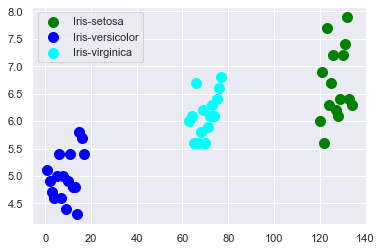

In [93]:
mlpb.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='green', label='Iris-setosa')
mlpb.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Iris-versicolor')
mlpb.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='cyan', label='Iris-virginica')


mlpb.legend()